In [1]:
# Import libraries 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm #i like statsmodels result table, lets me explore the coefficents more.
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lazypredict.Supervised import LazyClassifier

from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier

C:\Users\abebu\DS\envs\happy\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#load happiness survey data 
h_customer = pd.read_csv('ACME-HappinessSurvey2020.csv', header=0)
h_customer.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
# Lets label the columns - helps to know what y or x1, x2 etc are. Alos, this is a managable number of variables. 

h_customer = h_customer.rename(columns = {'Y': 'happy', 'X1': 'order_ontime', 'X2': 'order_content_as_expected', 'X3': 'ordered_everything', 'X4': 'paid_good_price', 'X5': 'satisfied_courier', 'X6': 'easy_app'})
h_customer

,happy,order_ontime,order_content_as_expected,ordered_everything,paid_good_price,satisfied_courier,easy_app
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [4]:
# It looks like feedback from custmers (features) is on 1-5 scale lets check
h_customer.describe()

,happy,order_ontime,order_content_as_expected,ordered_everything,paid_good_price,satisfied_courier,easy_app
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,0.55,4.33,2.53,3.31,3.75,3.65,4.25
std,0.50,0.80,1.11,1.02,0.88,1.15,0.81
min,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,0.00,4.00,2.00,3.00,3.00,3.00,4.00
50%,1.00,5.00,3.00,3.00,4.00,4.00,4.00
75%,1.00,5.00,3.00,4.00,4.00,4.00,5.00
max,1.00,5.00,5.00,5.00,5.00,5.00,5.00


[Text(0.5, 1.0, 'Correlations: Customer Happiness')]

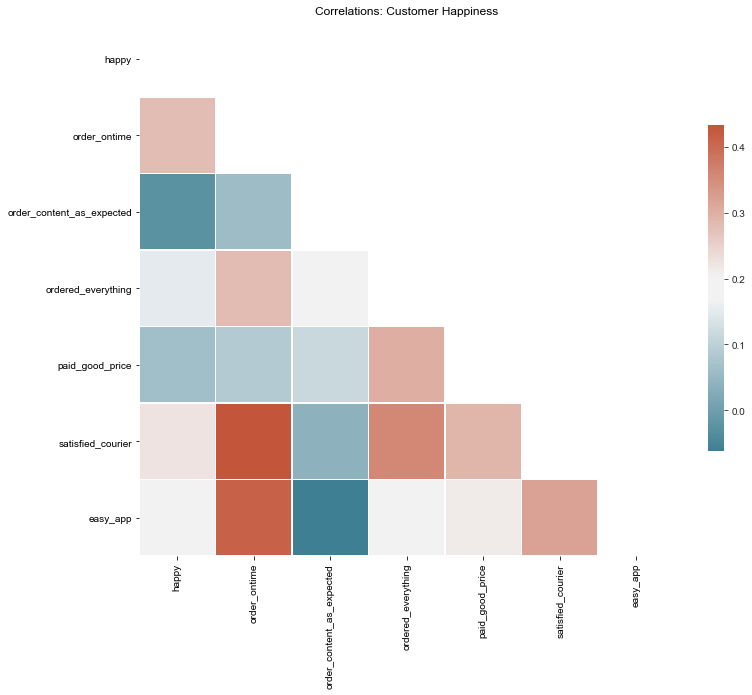

In [5]:
#lets do some visualization to get a sense of the data we have 

# Compute correlations
corr = h_customer.corr()


# Set up  matplotlib figure
f, ax = plt.subplots(figsize = (12, 12))

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')


# Add diverging colormap
#cmap =sns.diverging_palette(150, 275, s=80, l=55, n=12)
cmap = sns.diverging_palette(220, 20, sep = 20, as_cmap = True)

# Draw correlation plot
sns.heatmap(corr, mask = mask, cmap = cmap, 
        square = True,
        linewidths = .5, cbar_kws = {"shrink": .5}, ax = ax)
ax.set (title = 'Correlations: Customer Happiness')

In [6]:
# lets see if there are any null values 
h_customer.isnull().sum()

happy                        0
order_ontime                 0
order_content_as_expected    0
ordered_everything           0
paid_good_price              0
satisfied_courier            0
easy_app                     0
dtype: int64

In [7]:
# Also, we need to check if there are imbalances in the number of happy and unhappy rows.

happy, unhappy = h_customer.happy.value_counts()
happy, unhappy

(69, 57)

In [8]:
# lets separate target variable (y) and the features (x)
x = h_customer.drop(['happy'], axis = 1)
x

,order_ontime,order_content_as_expected,ordered_everything,paid_good_price,satisfied_courier,easy_app
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5
...,...,...,...,...,...,...
121,5,2,3,4,4,3
122,5,2,3,4,2,5
123,5,3,3,4,4,5
124,4,3,3,4,4,5


In [9]:
# y, target variable 'happy'

y = h_customer['happy'].values
y

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [10]:
# lets change all the features to binary class using get_dummies

x = x.astype('category')
x = pd.get_dummies(x)
x

,order_ontime_1,order_ontime_3,order_ontime_4,order_ontime_5,order_content_as_expected_1,order_content_as_expected_2,order_content_as_expected_3,order_content_as_expected_4,order_content_as_expected_5,ordered_everything_1,...,satisfied_courier_1,satisfied_courier_2,satisfied_courier_3,satisfied_courier_4,satisfied_courier_5,easy_app_1,easy_app_2,easy_app_3,easy_app_4,easy_app_5
0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
122,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
123,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
124,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [11]:
# Statsmodel.api output has a more interpretable OLS regression table  

OLS_reg = sm.OLS(y,x)
result = OLS_reg.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     1.347
Date:                Tue, 03 Nov 2020   Prob (F-statistic):              0.158
Time:                        17:32:39   Log-Likelihood:                -74.167
No. Observations:                 126   AIC:                             196.3
Df Residuals:                     102   BIC:                             264.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
order_ontime_1                 -0.4624      0.509     -0.909      0.365      -1.471       0.546
order_ontime_3                  0.1943      0.148      1.313      0.192      -0.099       0.488
order_ontime_4                  0.0170      0.152      0.112      0.911      -0.285       0.319
order_ontime_5                  0.4376      0.155      2.830      0.006       0.131       0.744
order_content_as_expected_1     0.0730      0.106      0.687      0.494      -0.138       0.284
order_content_as_expected_2     0.0916      0.103      0.887      0.377      -0.113       0.296
order_content_as_expected_3     0.0441      0.099      0.447      0.656      -0.151       0.240
order_content_as_expected_4    -0.1246      0.125     -0.999      0.320      -0.372       0.123
order_content_as_expected_5     0.1024      0.209      0.490      0.625      -0.312       0.517
ordered_everything_1           -0.0536      0.193     -0.278      0.782      -0.436       0.329
ordered_everything_2           -0.0332      0.139     -0.239      0.812      -0.309       0.243
ordered_everything_3            0.0393      0.092      0.425      0.672      -0.144       0.223
ordered_everything_4            0.2159      0.116      1.858      0.066      -0.015       0.446
ordered_everything_5            0.0179      0.164      0.109      0.913      -0.308       0.344
paid_good_price_1               0.4141      0.482      0.860      0.392      -0.541       1.369
paid_good_price_2              -0.3321      0.234     -1.422      0.158      -0.795       0.131
paid_good_price_3              -0.0135      0.152     -0.089      0.929      -0.315       0.288
paid_good_price_4               0.0736      0.146      0.505      0.615      -0.215       0.362
paid_good_price_5               0.0444      0.159      0.279      0.781      -0.271       0.359
satisfied_courier_1             0.1397      0.231      0.604      0.547      -0.319       0.598
satisfied_courier_2            -0.0666      0.142     -0.470      0.639      -0.348       0.214
satisfied_courier_3             0.0403      0.136      0.296      0.768      -0.229       0.310
satisfied_courier_4            -0.0485      0.114     -0.424      0.672      -0.275       0.178
satisfied_courier_5             0.1215      0.127      0.955      0.342      -0.131       0.374
easy_app_1                     -0.0220      0.729     -0.030      0.976      -1.468       1.424
easy_app_2                     -0.1142      0.574     -0.199      0.843      -1.253       1.024
easy_app_3                     -0.0386      0.209     -0.184      0.854      -0.454       0.377
easy_app_4                      0.3169      0.185      1.712      0.090      -0.050       0.684
easy_app_5                      0.0443      0.185      0.239      0.811      -0.323       0.412
===========

At this point it looks like delivering orders ontime (ordering everything a customer wanted, and having an app that makes it easy to order seems to be the most significant predicting features). An interesting observation is that sometimes we find _4 to be signficant than _5, this can only be due to small sample size. 

In [12]:
#Explore which models would work well with this dataset. `lazyPredict` helps generate sutable models. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

clf = LazyClassifier(verbose = 0, ignore_warnings = True, predictions = True, custom_metric = None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

print(models)

100%|██████████| 30/30 [00:00<00:00, 668.46it/s]

                    Accuracy  Balanced Accuracy  ROC AUC  F1 Score  Time Taken
Model                                                                         
DummyClassifier         0.54               0.57     0.57      0.54        0.00
CheckingClassifier      0.62               0.50     0.50      0.47        0.01


In [13]:
# Well the 'lazyPredict' did not work, despite creating a separate vertual environment for the project. I am going to implement select models that I think may perfrom well for such dataset and business problem, manually. 

def evaluate(x_train, x_test, y_train, y_test):
    #Names of models
    model_name_list = ['Random Forest Classifier',
                       'Gradient Boosting Classifier', 
                      'Logistic Regression',
                      'SVC',
                      'Ridge Classifier',
                      'AdaBoost Classifier',
                      'KNeighborsClassifier',
                      'Bagging Classifier',
                      'Bernoulli Naive Bayes',
                      'MLP Classifier']
    model = np.arange(1, 11)
    train_accuracy = np.empty(len(model))
    test_accuracy = np.empty(len(model))
    # Instantiate the models
    model1 = RandomForestClassifier(n_estimators=100)
    model2 = GradientBoostingClassifier(n_estimators=100)
    model3 = LogisticRegression()
    model4 = SVC (gamma='auto')
    model5 = RidgeClassifier ()
    model6 = AdaBoostClassifier (n_estimators=100)
    model7 = KNeighborsClassifier (n_neighbors=3)
    model8 = BaggingClassifier(n_estimators=100)
    model9 = BernoulliNB()
    model10 = MLPClassifier (max_iter=300)
    results =pd.DataFrame(columns=['train_accuracy', 'test_accuracy'])    
    
    model_list = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]
    # Train and predict with each model
    for i, model in enumerate(model_list):
        model.fit(x_train, y_train)
        
        train_accuracy=model.score(x_train, y_train)
        test_accuracy=model.score(x_test, y_test)
        
        model_name=model_name_list[i]
        results.loc[model_name, :] =[train_accuracy, test_accuracy]
    return results


results = evaluate(x_train, x_test, y_train, y_test)
results

,train_accuracy,test_accuracy
Random Forest Classifier,0.95,0.58
Gradient Boosting Classifier,0.95,0.58
Logistic Regression,0.72,0.54
SVC,0.70,0.50
Ridge Classifier,0.72,0.54
AdaBoost Classifier,0.72,0.58
KNeighborsClassifier,0.78,0.50
Bagging Classifier,0.95,0.58
Bernoulli Naive Bayes,0.69,0.58
MLP Classifier,0.95,0.65


The ensamble (random forest, gradient boosting, and bagging) and the neurarl network model (MLP), fitted very well on the training data (each with 95% accuracy). However, all the models have overfitted and are biased towards the training data. One solution is using cross-validation. 

In [14]:
def cv_evaluate(x_train, x_test, y_train, y_test):
    #Names of models
    model_name_list = ['Random Forest Classifier',
                       'Gradient Boosting Classifier', 
                      'Logistic Regression',
                      'SVC',
                      'Ridge Classifier',
                      'AdaBoost Classifier',
                      'KNeighborsClassifier',
                      'Bagging Classifier',
                      'Bernoulli Naive Bayes',
                      'MLP Classifier']
    model = np.arange(1, 11)
    avg_train_cv_accuracy = np.empty(len(model))
    test_accuracy = np.empty(len(model))
    # Instantiate the models
    model1 = RandomForestClassifier(n_estimators=100)
    model2 = GradientBoostingClassifier(n_estimators=100)
    model3 = LogisticRegression()
    model4 = SVC (gamma='auto')
    model5 = RidgeClassifier ()
    model6 = AdaBoostClassifier (n_estimators=100)
    model7 = KNeighborsClassifier (n_neighbors=3)
    model8 = BaggingClassifier(n_estimators=100)
    model9 = BernoulliNB()
    model10 = MLPClassifier (max_iter=300)
    results =pd.DataFrame(columns=['avg_train_cv_accuracy', 'avg_test_accuracy'])    
    
    model_list = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]
    # Train and predict with each model
    for i, model in enumerate(model_list):
        model.fit(x_train, y_train)
              
        train_cv_accuracy = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5)
        avg_train_cv_accuracy = train_cv_accuracy.mean()
        test_cv_accuracy = cross_val_score(estimator = model, X = x_test, y = y_test, cv = 5)
        avg_test_cv_accuracy = test_cv_accuracy.mean()
        
        model_name=model_name_list[i]
        results.loc[model_name, :] = [avg_train_cv_accuracy, avg_test_cv_accuracy]
    return results


results = cv_evaluate(x_train, x_test, y_train, y_test)
results

,avg_train_cv_accuracy,avg_test_accuracy
Random Forest Classifier,0.61,0.50
Gradient Boosting Classifier,0.58,0.42
Logistic Regression,0.60,0.50
SVC,0.59,0.61
Ridge Classifier,0.59,0.50
AdaBoost Classifier,0.57,0.66
KNeighborsClassifier,0.56,0.57
Bagging Classifier,0.61,0.30
Bernoulli Naive Bayes,0.61,0.39
MLP Classifier,0.61,0.67


Here, although the model performance reduced significantly, the variance between training data and testing data performance is low. Random forest and gradient boosting cassifiers have performed better. 

In [15]:
# Considering this is a small dataset spliting further may be the problem on model performance. Lets see what happens if we use CV resample method on the entire dataset. 

def cv_evaluate(x_train, x_test, y_train, y_test):
    #Names of models
    model_name_list = ['Random Forest Classifier',
                       'Gradient Boosting Classifier', 
                      'Logistic Regression',
                      'SVC',
                      'Ridge Classifier',
                      'AdaBoost Classifier',
                      'KNeighborsClassifier',
                      'Bagging Classifier',
                      'Bernoulli Naive Bayes',
                      'MLP Classifier']
    model = np.arange(1, 11)
    avg_train_cv_accuracy = np.empty(len(model))
    test_accuracy = np.empty(len(model))
    # Instantiate the models
    model1 = RandomForestClassifier(n_estimators=100)
    model2 = GradientBoostingClassifier(n_estimators=100)
    model3 = LogisticRegression()
    model4 = SVC (gamma='auto')
    model5 = RidgeClassifier ()
    model6 = AdaBoostClassifier (n_estimators=100)
    model7 = KNeighborsClassifier (n_neighbors=3)
    model8 = BaggingClassifier(n_estimators=100)
    model9 = BernoulliNB()
    model10 = MLPClassifier (max_iter=300)
    results =pd.DataFrame(columns=['avg_train_cv_accuracy', 'test_accuracy'])    
    
    model_list = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]
    # Train and predict with each model
    for i, model in enumerate(model_list):
        model.fit(x_train, y_train)
              
        train_cv_accuracy = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5)
        avg_train_cv_accuracy = train_cv_accuracy.mean()
        test_accuracy = model.score(x_test, y_test)
        
        model_name=model_name_list[i]
        results.loc[model_name, :] = [avg_train_cv_accuracy, test_accuracy]
    return results


results = cv_evaluate(x_train, x_test, y_train, y_test)
results

,avg_train_cv_accuracy,test_accuracy
Random Forest Classifier,0.58,0.58
Gradient Boosting Classifier,0.58,0.62
Logistic Regression,0.60,0.54
SVC,0.59,0.50
Ridge Classifier,0.59,0.54
AdaBoost Classifier,0.57,0.58
KNeighborsClassifier,0.56,0.50
Bagging Classifier,0.59,0.62
Bernoulli Naive Bayes,0.61,0.58
MLP Classifier,0.59,0.58


In [16]:
def cv_evaluate(x, y):
    #Names of models
    model_name_list = ['Random Forest Classifier',
                       'Gradient Boosting Classifier', 
                      'Logistic Regression',
                      'SVC',
                      'Ridge Classifier',
                      'AdaBoost Classifier',
                      'KNeighborsClassifier',
                      'Bagging Classifier',
                      'Bernoulli Naive Bayes',
                      'MLP Classifier']
    model = np.arange(1, 11)
    cv_accuracies = np.empty(len(model))
    avg_cv_accuracy = np.empty(len(model))
    # Instantiate the models
    model1 = RandomForestClassifier(n_estimators=100)
    model2 = GradientBoostingClassifier(n_estimators=100)
    model3 = LogisticRegression()
    model4 = SVC (gamma='auto')
    model5 = RidgeClassifier ()
    model6 = AdaBoostClassifier (n_estimators=100)
    model7 = KNeighborsClassifier (n_neighbors=3)
    model8 = BaggingClassifier(n_estimators=100)
    model9 = BernoulliNB()
    model10 = MLPClassifier (max_iter=300)
    results =pd.DataFrame(columns=['cv_accuracies', 'avg_cv_accuracy'])    
    
    model_list = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]
    # Train and predict with each model
    for i, model in enumerate(model_list):
        model.fit(x, y)
              
        cv_accuracies = cross_val_score(estimator = model, X = x, y = y, cv = 5)
        avg_cv_accuracy = cv_accuracies.mean()
        
        model_name=model_name_list[i]
        results.loc[model_name, :] = [np.round(cv_accuracies, 2), avg_cv_accuracy]
    return results


results = cv_evaluate(x, y)
results

,cv_accuracies,avg_cv_accuracy
Random Forest Classifier,"[0.65, 0.44, 0.52, 0.8, 0.52]",0.59
Gradient Boosting Classifier,"[0.5, 0.48, 0.68, 0.76, 0.52]",0.59
Logistic Regression,"[0.62, 0.52, 0.6, 0.68, 0.56]",0.60
SVC,"[0.58, 0.48, 0.6, 0.64, 0.56]",0.57
Ridge Classifier,"[0.58, 0.52, 0.6, 0.68, 0.6]",0.60
AdaBoost Classifier,"[0.54, 0.48, 0.4, 0.68, 0.52]",0.52
KNeighborsClassifier,"[0.42, 0.64, 0.64, 0.64, 0.56]",0.58
Bagging Classifier,"[0.62, 0.48, 0.56, 0.72, 0.64]",0.60
Bernoulli Naive Bayes,"[0.54, 0.6, 0.64, 0.8, 0.48]",0.61
MLP Classifier,"[0.62, 0.4, 0.6, 0.72, 0.48]",0.56


spliting the small dataset wasn't the issue here. 

In [17]:
# Lets pick the top 2 models and finetune the parameters by combining grid search with CV resampling method to further imporve model accuracy. 
# The top 2 best performing models are `RandomForestClassifier` and `MLPClassifier`.

model1 = RandomForestClassifier()

# define parameter values
 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# define grid search
grid_search = GridSearchCV(estimator = model1, param_grid = param_grid, n_jobs = -1, cv = 5, scoring = 'accuracy', error_score = 0, verbose = 2)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print(f"Best score on training data: {grid_result.best_score_} using {grid_result.best_params_}")


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  4.9min finished


Best score on training data: 0.6399999999999999 using {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 200}


In [20]:
# Best score on testing data
rfc = RandomForestClassifier(bootstrap =  True, max_depth = 80, max_features = 2, min_samples_leaf = 4, min_samples_split = 8, n_estimators = 200)
rfc.fit(x_test, y_test)

test_accuracy = rfc.score(x_test, y_test)

# summarize results
print(f"Random Forest Classifier Accuracy on testing data: {test_accuracy}")

Random Forest Classifier Accuracy on testing data: 0.6153846153846154


In [21]:
model10 = MLPClassifier (max_iter=100)

# define parameter values
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# define grid search
grid_search = GridSearchCV(estimator = model10, param_grid = parameter_space, n_jobs = -1, cv = 5, scoring = 'accuracy', error_score = 0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print(f"Best score on training data: {grid_result.best_score_} using {grid_result.best_params_}")


Best score on training data: 0.6599999999999999 using {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [22]:
# Best score on testing data
mlp = MLPClassifier (hidden_layer_sizes = (100,), activation = 'relu', solver = 'adam', alpha = 0.0001, learning_rate = 'adaptive')
mlp.fit(x_test, y_test)

test_accuracy = mlp.score(x_test, y_test)

# summarize results
print(f"Random Forest Classifier Accuracy on testing data: {test_accuracy}")

Random Forest Classifier Accuracy on testing data: 0.9615384615384616
